# BIG DATA ASSIGNMENT
## ONLINE RETAIL II DATASET
## In this assignment
###  Explain if there is a relation among: type of product, price and quantity; Explain the differences between years in terms sales, not only in total quantity, but also about different products, quantities and dates. 
###  What would you recommend for improving earnings with only the existing products: increase the number of sales by product or increase the number quantity sold by product.  You must mention which products must the retailer target. 


### DATA SOURCE
#### url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx"
##### This dataset is about the transaction of an online store registered and based in UK containing all transaction between 01/12/2009 to 09/12/2011. Looking over the data description it seem like they basicly deal with gift items.

In [340]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import dateutil
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading dataset to pandas dataframe (df)

xls = pd.ExcelFile('online_retail_II.xlsx')
df1 = pd.read_excel(xls, 'Year 2009-2010')
df2 = pd.read_excel(xls, 'Year 2010-2011')


#df = pd.read_excel('online_retail_II.xlsx');
#df200910 = Year 2009-2010
#print(df1.head())
#print(df2.head())

#### File provided contain two data : as  ' Year 2009-2010 ' & 'Year 2010-2011' in seperate excel sheet.
#### Now lets clear the datasets

In [265]:
df200910 = df1
df201011 = df2

In [266]:
#print(df200910.info())
#print(df201011.info())

In [267]:
#Total data point
print("Data file shape of year 2009-2010 is {} and that of year 2010-2011 is  {}".format(df200910.shape,df201011.shape))

Data file shape of year 2009-2010 is (417534, 8) and that of year 2010-2011 is  (406830, 8)


In [277]:
df200910.describe()

,Quantity,Price,Customer ID
count,417534.000000,417534.000000,417534.000000
mean,12.758815,3.887547,15360.645478
std,101.220424,71.131797,1680.811316
min,-9360.000000,0.000000,12346.000000
25%,2.000000,1.250000,13983.000000
50%,4.000000,1.950000,15311.000000
75%,12.000000,3.750000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [278]:
df201011.describe()

,Quantity,Price,Customer ID
count,406830.000000,406830.000000,406830.000000
mean,12.061276,3.460507,15287.684160
std,248.693065,69.315080,1713.603074
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [279]:
# missing and null value from the dataset

#print(df200910.isnull().sum())
#print(df201011.isnull().sum())
df200910.dropna(inplace=True)
df201011.dropna(inplace=True)

#### It seems that quantity with negetative value are cancelled product.  There lets not remove it and make sure the data has no negetive price item.

In [280]:
df200910=df200910[(df200910['Price']>0)]
df201011=df201011[(df201011['Price']>0)]
print("Data file shape of year 2009-2010 is {} and that of year 2010-2011 is  {}".format(df200910.shape,df201011.shape))

Data file shape of year 2009-2010 is (417503, 8) and that of year 2010-2011 is  (406790, 8)


#### It seems that there are some manaul entry with StockCode = M in the datasheet, which doesn't define exact items so these values can be removed

In [281]:
df200910=df200910[(df200910['StockCode']!='M')]
df201011=df201011[(df201011['StockCode']!='M')]
print("Data file shape of year 2009-2010 is {} and that of year 2010-2011 is  {}".format(df200910.shape,df201011.shape))

Data file shape of year 2009-2010 is (416854, 8) and that of year 2010-2011 is  (406331, 8)


In [282]:
df200910.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [283]:
df201011.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# getting transaction in various country


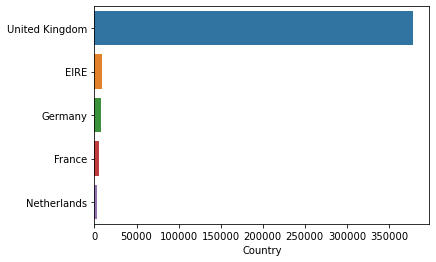

In [284]:
country_plot = pd.DataFrame(df200910.Country.value_counts().head(5))
#Country.value_counts() gives count result of coutries and head(10) sorts top 10
sns.barplot(country_plot.Country,country_plot.index)
plt.show()

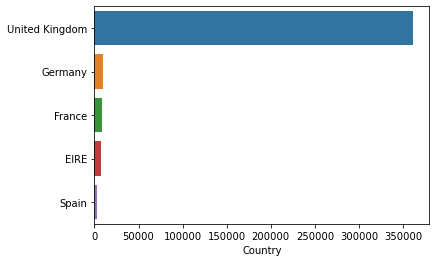

In [285]:
country_plot = pd.DataFrame(df201011.Country.value_counts().head(5))
#Country.value_counts() gives count result of coutries and head(10) sorts top 10
sns.barplot(country_plot.Country,country_plot.index)
plt.show()

#### It is cleary seen that in each year most of the transaction are within United Kingdom. There lets clear data other than country 'United Kingdom'

In [286]:
cleanDf200910 = df200910[(df200910['Country']=="United Kingdom")]
cleanDf201011 = df201011[(df201011['Country']=="United Kingdom")]
#print(cleanDf200910.shape)
#cleanDf200910.head()
print("Shape after cleaning country is 2009-2010: {} and 2010-2011 is {}".format(cleanDf200910.shape,cleanDf201011.shape))

Shape after cleaning country is 2009-2010: (378852, 8) and 2010-2011 is (361472, 8)


#### Lets add total price at the end of the each row and short with highest value at the top

In [287]:

cleanDf200910["TotalPrice"] = cleanDf200910["Quantity"] * cleanDf200910["Price"]
cleanDf200910 = cleanDf200910.sort_values("TotalPrice", ascending=False)
#For sheet 2010-2011
cleanDf201011["TotalPrice"] = cleanDf201011["Quantity"] * cleanDf201011["Price"]
cleanDf201011 = cleanDf201011.sort_values("TotalPrice", ascending=False)

#(cleanDf201011.shape)
cleanDf201011.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.60
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60
222671,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,38970.00
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,8142.75
348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,5.06,17450.0,United Kingdom,7144.72


In [288]:
#Quanity Sales
qsales200910 = cleanDf200910.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False)
qsales201011 = cleanDf201011.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False)
#qsales201011.head()
#qsales = [qsales200910['Description'],qsales200910['Quantity'],qsales201011['Quantity']]
#headers = ["Item", "Sales 2009-2010","Sales 2010-2011"]
#qsaleDf = pd.concat(qsales, axis=1, keys=headers)
qsales = pd.merge(qsales200910, qsales201011, on=['Description'], how='outer',suffixes=('-2009-2010', '-2010-2011'))
qsales.fillna(0)
qsales['Quantity-2010-2011'] = qsales['Quantity-2010-2011'].replace(np.nan, 0)
qsales['Quantity-2009-2010'] = qsales['Quantity-2009-2010'].replace(np.nan, 0)
#removind all negetive quantity value
qsales = qsales[(qsales['Quantity-2010-2011']>=0)]
qsales = qsales[(qsales['Quantity-2009-2010']>=0)]
print(qsales.shape)
qsales.head()
#print(qsales.shape)

(5214, 2)


,Quantity-2009-2010,Quantity-2010-2011
Description,,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,51058.0,47982.0
WHITE HANGING HEART T-LIGHT HOLDER,50663.0,32097.0
BROCADE RING PURSE,47314.0,22708.0
ASSORTED COLOUR BIRD ORNAMENT,41098.0,32679.0
PACK OF 72 RETRO SPOT CAKE CASES,34986.0,0.0


<AxesSubplot:xlabel='Description'>

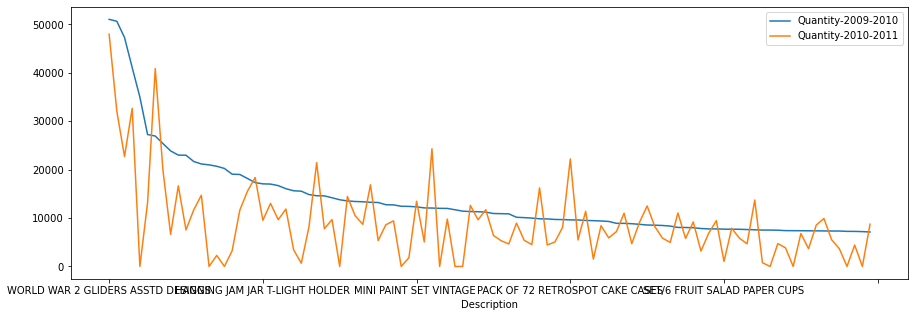

In [289]:
qsaleGraph = pd.DataFrame(qsales,columns= ['Quantity-2009-2010','Quantity-2010-2011'])
qsaleGraph = qsaleGraph.head(100)
qsaleGraph.plot(kind='line',figsize=(15,5))

In [290]:
#Price Sales
psales200910 = cleanDf200910.groupby("Description").agg({"TotalPrice": "sum"}).sort_values("TotalPrice", ascending=False)
psales201011 = cleanDf201011.groupby("Description").agg({"TotalPrice": "sum"}).sort_values("TotalPrice", ascending=False)

psales = pd.merge(psales200910, psales201011, on=['Description'], how='outer',suffixes=('-2009-2010', '-2010-2011'))
psales.fillna(0)
psales['TotalPrice-2010-2011'] = psales['TotalPrice-2010-2011'].replace(np.nan, 0)
psales['TotalPrice-2009-2010'] = psales['TotalPrice-2009-2010'].replace(np.nan, 0)
#removind all negetive quantity value
psales = psales[(psales['TotalPrice-2010-2011']>=0)]
psales = psales[(psales['TotalPrice-2009-2010']>=0)]
print(qsales.shape)
psales.head()
#print(qsales.shape)

(5214, 2)


,TotalPrice-2009-2010,TotalPrice-2010-2011
Description,,
WHITE HANGING HEART T-LIGHT HOLDER,135321.76,88313.95
REGENCY CAKESTAND 3 TIER,117250.20,103122.85
ASSORTED COLOUR BIRD ORNAMENT,65131.78,52314.87
JUMBO BAG RED RETROSPOT,47179.80,75416.67
ROTATING SILVER ANGELS T-LIGHT HLDR,38256.60,16345.72


In [291]:
psalesMost = psales[(psales['TotalPrice-2010-2011']>psales['TotalPrice-2009-2010'])]
psalesMost.head()

,TotalPrice-2009-2010,TotalPrice-2010-2011
Description,,
JUMBO BAG RED RETROSPOT,47179.80,75416.67
PAPER CHAIN KIT 50'S CHRISTMAS,36007.55,39596.73
PARTY BUNTING,31952.05,61952.58
BLACK RECORD COVER FRAME,27545.16,37799.42
CHILLI LIGHTS,25970.78,45155.61


In [292]:
psalesLeast = psales[(psales['TotalPrice-2010-2011']<psales['TotalPrice-2009-2010'])]
psalesLeast.head()

,TotalPrice-2009-2010,TotalPrice-2010-2011
Description,,
WHITE HANGING HEART T-LIGHT HOLDER,135321.76,88313.95
REGENCY CAKESTAND 3 TIER,117250.20,103122.85
ASSORTED COLOUR BIRD ORNAMENT,65131.78,52314.87
ROTATING SILVER ANGELS T-LIGHT HLDR,38256.60,16345.72
VINTAGE UNION JACK BUNTING,32977.46,20239.66


Total Sales in year 2009-2010 is 7081342.52 and in year 2010-2011 is 6833552.24


<AxesSubplot:xlabel='Description'>

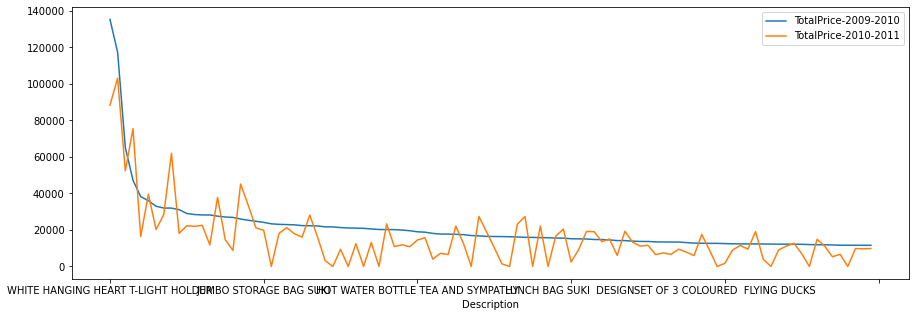

In [293]:
print("Total Sales in year 2009-2010 is {} and in year 2010-2011 is {}".format(psales['TotalPrice-2009-2010'].sum().round(2),psales['TotalPrice-2010-2011'].sum().round(2)))
psaleGraph = pd.DataFrame(psales,columns= ['TotalPrice-2009-2010','TotalPrice-2010-2011'])
psaleGraph = psaleGraph.head(100)
psaleGraph.plot(kind='line',figsize=(15,5))

In [294]:
qsales.describe()

,Quantity-2009-2010,Quantity-2010-2011
count,5214.000000,5214.000000
mean,828.506713,765.908707
std,2421.305185,2102.840337
min,0.000000,0.000000
25%,9.000000,0.000000
50%,147.000000,84.000000
75%,693.500000,662.000000
max,51058.000000,47982.000000


In [295]:
psales.describe()

,TotalPrice-2009-2010,TotalPrice-2010-2011
count,5214.000000,5214.000000
mean,1358.140107,1310.616080
std,4039.889090,3958.265002
min,0.000000,0.000000
25%,25.500000,0.000000
50%,279.870000,161.465000
75%,1143.840000,984.102500
max,135321.760000,103122.850000


In [334]:
newdf = pd.merge(psales, qsales, on=['Description'], how='outer')
#newdf.replace(np.nan, 0)

#print("Year wise Sales Dataframe including Price and Quantity Sold")
newdf.head(4)

,TotalPrice-2009-2010,TotalPrice-2010-2011,Quantity-2009-2010,Quantity-2010-2011
Description,,,,
WHITE HANGING HEART T-LIGHT HOLDER,135321.76,88313.95,50663.0,32097.0
REGENCY CAKESTAND 3 TIER,117250.20,103122.85,10160.0,8948.0
ASSORTED COLOUR BIRD ORNAMENT,65131.78,52314.87,41098.0,32679.0
JUMBO BAG RED RETROSPOT,47179.80,75416.67,26950.0,40880.0


<AxesSubplot:>

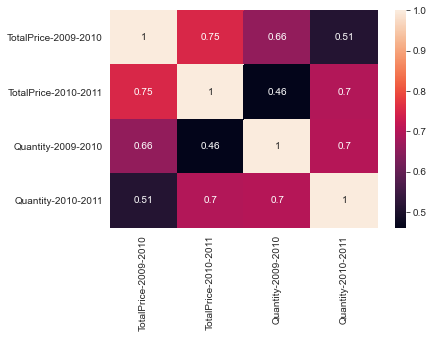

In [341]:
#A grid plot of all the variables.
#sns.pairplot(newdf)
sns.heatmap(newdf.corr(), annot = True)

In [298]:
#Quanity Sales
#cleanDf200910.head()
cleanDf200910['Date'] = cleanDf200910['InvoiceDate'].astype(str).str[:10]
cleanDf201011['Date'] = cleanDf201011['InvoiceDate'].astype(str).str[:10]
#cleanDf200910['Date'] = cleanDf200910['Date'].replace(np.nan, 0)
#cleanDf201011['Date'] = cleanDf201011['Date'].replace(np.nan, 0)
#psales['TotalPrice-2009-2010'] = psales['TotalPrice-2009-2010'].replace(np.nan, 0)
#cleanDf200910.head()
cleanDf201011.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Date
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.60,2011-12-09
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60,2011-01-18
222671,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,38970.00,2011-06-10
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,8142.75,2011-05-03
348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,5.06,17450.0,United Kingdom,7144.72,2011-09-20


In [299]:
dsales200910 = cleanDf200910.groupby("Date").agg({"TotalPrice": "sum","Quantity":"sum"}).sort_values("TotalPrice", ascending=False)
#qDate = pd.merge(qDate200910, qDate201011, on=['Date'], how='outer',suffixes=('-2009-2010', '-2010-2011'))
print("Year 2009 2010")
dsales200910.head()

Year 2009 2010


,TotalPrice,Quantity
Date,,
2010-09-27,86883.50,117739
2010-11-04,75890.94,53947
2010-10-14,73161.45,27958
2010-11-10,67291.07,30811
2010-11-25,65334.58,36227


<AxesSubplot:xlabel='Date'>

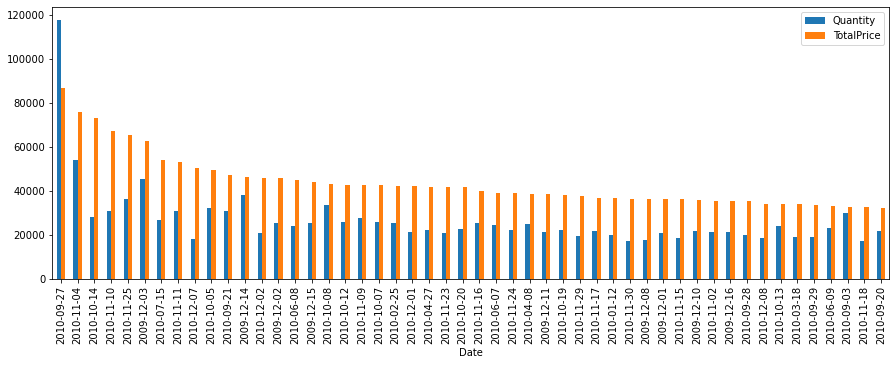

In [300]:
dateGraph2009 = pd.DataFrame(dsales200910,columns= ['Quantity','TotalPrice'])
#dateGraph2009.head(50)
dateGraph2009 = dateGraph2009.head(50)
dateGraph2009.plot(kind='bar',figsize=(15,5))

<AxesSubplot:xlabel='Quantity'>

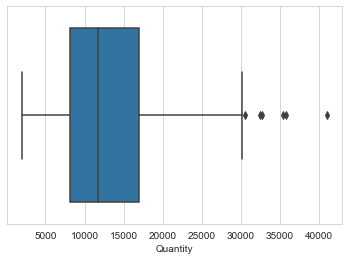

In [343]:
sns.boxplot(dsales201011["Quantity"])

<AxesSubplot:xlabel='TotalPrice'>

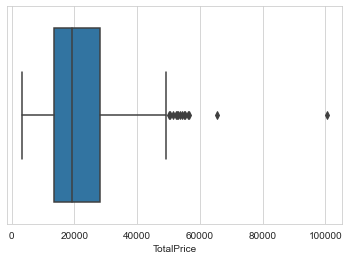

In [344]:
sns.boxplot(dsales201011["TotalPrice"])

<AxesSubplot:xlabel='Date'>

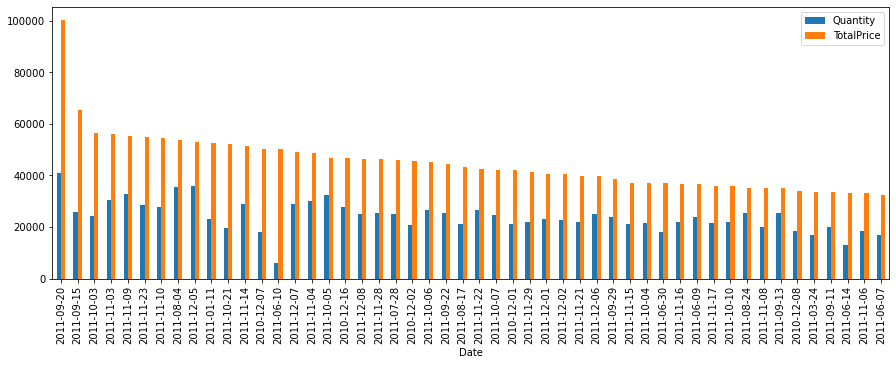

In [301]:
dsales201011 = cleanDf201011.groupby("Date").agg({"TotalPrice": "sum","Quantity":"sum"}).sort_values("TotalPrice", ascending=False)
dateGraph2011 = pd.DataFrame(dsales201011,columns= ['Quantity','TotalPrice'])
#dateGraph2009.head(50)
dateGraph2011 = dateGraph2011.head(50)
dateGraph2011.plot(kind='bar',figsize=(15,5))

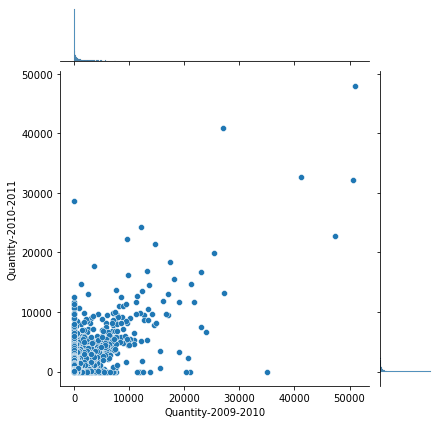

In [302]:
sns.jointplot(newdf['Quantity-2009-2010'],newdf['Quantity-2010-2011'])

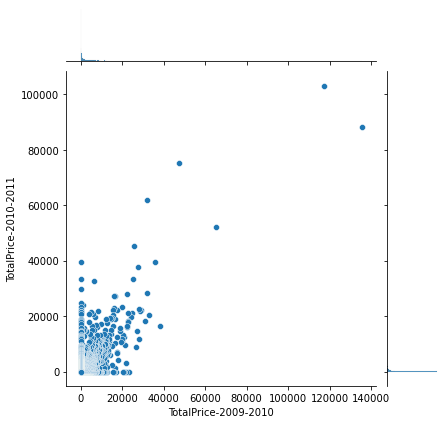

In [303]:
sns.jointplot(psales['TotalPrice-2009-2010'],psales['TotalPrice-2010-2011'])

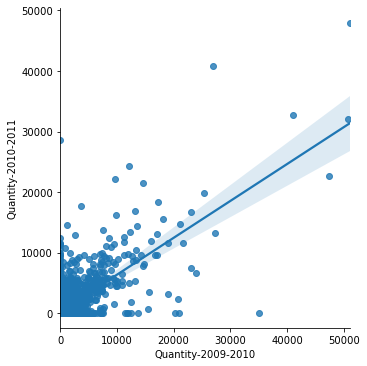

In [304]:
sns.lmplot(x='Quantity-2009-2010',y='Quantity-2010-2011',data = qsales)

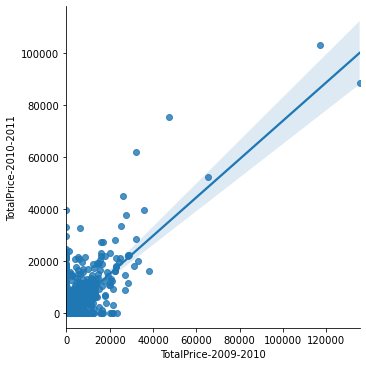

In [305]:
sns.lmplot(x='TotalPrice-2009-2010',y='TotalPrice-2010-2011',data = psales)

### Predictive Analysis

In [309]:
#qmodel = ols("Quantity-2009-2010 ~ Quantity-2010-2011", data=qsales).fit()
#qmodel.summary()
qsales.describe()
#dsales201011.describe()

,Quantity-2009-2010,Quantity-2010-2011
count,5214.000000,5214.000000
mean,828.506713,765.908707
std,2421.305185,2102.840337
min,0.000000,0.000000
25%,9.000000,0.000000
50%,147.000000,84.000000
75%,693.500000,662.000000
max,51058.000000,47982.000000


In [307]:
#print("For Year 2009 2010")
#sns.lmplot(x='TotalPrice',y='Quantity',data = dsales200910)

In [354]:
#Using Linear Regression to predict the amount of money spent based on the Sales Quantity and Prices.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

x1=qsales[['Quantity-2009-2010']]
y1=qsales['Quantity-2010-2011']

#Splitting the data into test data and training data
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2)

#Creating a Linear Regression model
lm1 = LinearRegression()
lm1.fit(x1_train,y1_train)
coeff_df1 = pd.DataFrame(lm1.coef_,x1.columns,columns=['Coefficient'])
coeff_df1
#print(lm1.coeff_)
#print(lm1.intercept_)

,Coefficient
Quantity-2009-2010,0.61


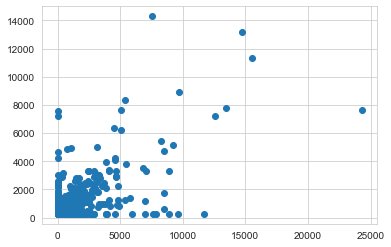

In [355]:
predictions1 = lm1.predict(x1_test)
plt.scatter(y1_test,predictions1)

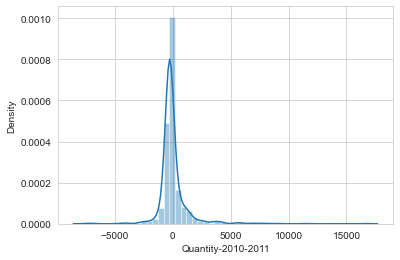

In [356]:
#plotting the distribution of the prediction erros. ]
sns.distplot((y1_test-predictions1),bins=50);

In [357]:
y1_pred = lm1.predict(x1_test)

In [358]:
dfPred = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred})
dfPred.head()

,Actual,Predicted
Description,,
RED RETROSPOT MUG,1482.0,1319.57
PINK MINI TAPE MEASURE,0.0,438.26
BLACK ENCHANTED FOREST PLACEMAT,585.0,689.28
RED DRAGONFLY HELICOPTER,75.0,280.07
PINK LOVE HEART SHAPE CUP,414.0,839.52


In [351]:
#cleanDf200910.to_csv('cleaned.csv')
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))

Mean Absolute Error: 631.6633286373024
Mean Squared Error: 1985320.246461761
Root Mean Squared Error: 1409.0139269935414


In [359]:
cleanDf200910.to_csv('cleansheet200910.csv')

In [360]:
cleanDf201011.to_csv('cleansheet201011.csv')